# <a id='toc1_'></a>[Emerging Technologies Project](#toc0_)

**By Ethan Conneely (G00393941)**

**Table of contents**<a id='toc0_'></a>    
- [Emerging Technologies Project](#toc1_)    
  - [Introduction](#toc1_1_)    
    - [Quantum Computing](#toc1_1_1_)    
    - [Deutsch's algorithm](#toc1_1_2_)    
  - [Library Imports](#toc1_2_)    
  - [Function Input](#toc1_3_)    
  - [Deutsch Algorithm circuit creation](#toc1_4_)    
  - [References:](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)

### <a id='toc1_1_1_'></a>[Quantum Computing](#toc0_)

Quantum computing is a new way of performing computation.  
It differs from classical computation by utilizing qubits instead of normal bits  
to perform a new type of computation that classical computation would  
take much longer to compute.


### <a id='toc1_1_2_'></a>[Deutsch's algorithm](#toc0_)


Deutsch's algorithm is a quantum algorithm that determines whether a given Boolean function is constant or balanced.

- A constant function is one that always returns the same value, regardless of the input.
- A balanced function is one that returns 0 for half of the inputs and 1 for the other half.

It can be represented using the following equation:

Deutsch's algorithm takes in 1 bit that are 0 or 1 and outputs a 1 bit also 0 or 1

$\Sigma = \{0,1\}$

$f : \Sigma\rightarrow \Sigma$

The algorithm outputs 0 for constant and 1 for balanced

It is effective doing the xor operation from classical computing.


## <a id='toc1_2_'></a>[Library Imports](#toc0_)

For quantum simulation in python Qiskit can be used.  
It is a library that we can use to run quantum simulations and make circuits.

Matplotlib will be used for visualising the circuit diagrams generated from qiskit.


In [92]:
from qiskit import QuantumCircuit, Aer
import matplotlib.pyplot as plt


## <a id='toc1_3_'></a>[Function Input](#toc0_)


Below are all the possible input function in a table [[1]](#1)

| function $f(x)$ | $x=0$ | $x=1$ | $f(0) ⨁ f(1)$ |
| --------------- | ----- | ----- | ------------- |
| $f_0$           | 0     | 0     | 0             |
| $f_1$           | 0     | 1     | 1             |
| $f_2$           | 1     | 0     | 1             |
| $f_3$           | 1     | 1     | 0             |


This is the first circuit it does nothing and is of type constant.


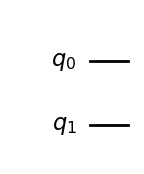

In [93]:
constantCircuitA = QuantumCircuit(2)
constantCircuitA.draw(output='mpl')


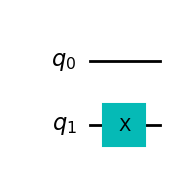

In [94]:
constantCircuitB = QuantumCircuit(2)
constantCircuitB.x(1)
constantCircuitB.draw(output='mpl')


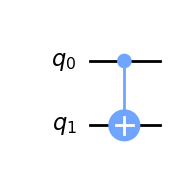

In [95]:
balancedCircuitA = QuantumCircuit(2)
balancedCircuitA.cx(0, 1)
balancedCircuitA.draw(output='mpl')


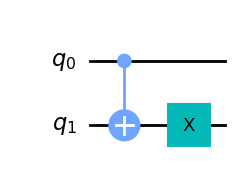

In [96]:
balancedCircuitB = QuantumCircuit(2)
balancedCircuitB.cx(0, 1)
balancedCircuitB.x(1)
balancedCircuitB.draw(output='mpl')


## <a id='toc1_4_'></a>[Deutsch Algorithm circuit creation](#toc0_)


The algorithm is made up of 2 qubits and 1 classical bit.  
It creates the circuit and combines in the function to be tested.

The basic layout for the diagram was gotten from this diagram i added in the function composition. [[2]](#2)


In [97]:
def deutsch_algorithm_circuit(function: QuantumCircuit) -> QuantumCircuit:
    """
    Implements Deutsch's algorithm to determine whether a function f is constant or balanced.

    Arguments:
        function (QuantumCircuit): The function to evaluate.

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """

    qc = QuantumCircuit(2, 1)

    # flipt the second qubit
    qc.x(1)

    # Apply Hadamard gates to both qubits
    qc.h(range(2))

    qc.barrier()  # for visual separation

    # Combine the functions into a single circuit
    qc.compose(function, range(2), inplace=True)

    qc.barrier()  # for visual separation

    # Apply Hadamard gates to qubit 0
    qc.h(0)

    qc.barrier()  # for visual separation

    # # Measure the first qubit
    qc.measure(0, 0)

    return qc


Run the simulation with Aer's qasm_simulator


In [98]:
def simulate_deutsch_algorithm(deutsch_circuit: QuantumCircuit) -> str:
    """
    Aer simulation of Deutsch's algorithm.

    Arguments:
        deutsch_circuit (QuantumCircuit): The Deutsch algorithm circuit.

    Returns:
        str: The function is either "constant" or "balanced".
    """

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')

    result = simulator.run(deutsch_circuit).result().get_counts()

    # Determine whether the function is constant or balanced
    # if there are more 0s than 1s, the function is constant
    if int(result.get("0", 0)) > int(result.get("1", 0)):
        return "constant"  # Function is constant
    else:
        return "balanced"  # Function is balanced


In [99]:
input_functions = [
    constantCircuitA, constantCircuitB, balancedCircuitA, balancedCircuitB
]


In [100]:
circuits = [deutsch_algorithm_circuit(f) for f in input_functions]


Below is the 4 complete circuits for each function [[1]](#1)

Below is all the diagrams for the 4 circuits and the results of the simulation.


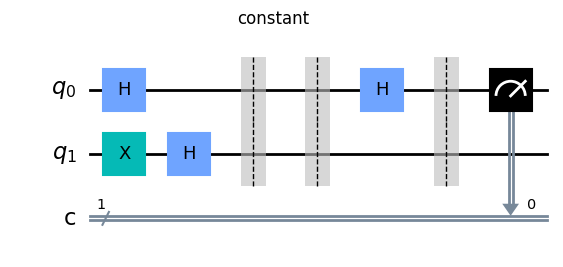

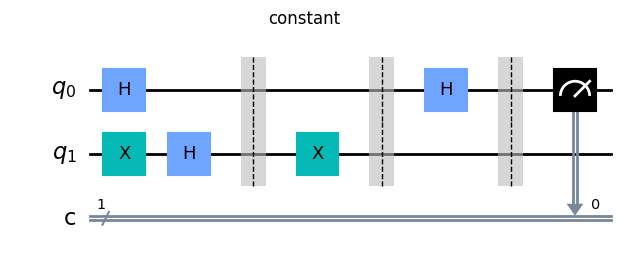

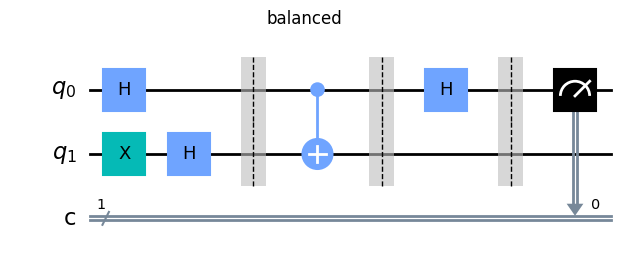

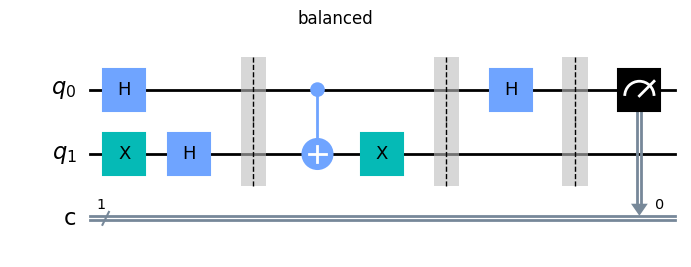

In [101]:
for circuit in circuits:
    # Create a figure
    fig = plt.figure(circuit.draw(output='mpl'))
    # Determine whether the circuit is constant or balanced
    state = simulate_deutsch_algorithm(circuit)
    # Add the title to the figure
    fig.suptitle(state)
    # Show the figure
    plt.show()


## <a id='toc1_5_'></a>[References:](#toc0_)

- <a id="1">[1]:</a> Input table reference  https://anonymousket.medium.com/quantum-algo-deutsch-algorithm-ccc119c69c08#b0aa
- <a id="2">[2]:</a> Circuit diagram reference  https://i.ytimg.com/vi/7MdEHsRZxvo/maxresdefault.jpg
- <a id="3">[3]:</a> https://www.youtube.com/watch?v=CytwIKt1P_0
- <a id="4">[4]:</a> https://anonymousket.medium.com/quantum-algo-deutsch-algorithm-ccc119c69c08
- <a id="5">[5]:</a> https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html
